In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms


In [ ]:
transform = transforms.ToTensor()

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True, transform=transform),
    batch_size=128,
    shuffle=True
)

In [ ]:
# from logging import log
class VAE(nn.Module) :
    def __init__(self) :
        super(VAE,self).__init__()

        # Encoder
        self.fc1 = nn.Linear(784,400)
        self.fc_mu = nn.Linear(400 , 20)
        self.fc_logvar = nn.Linear(400,20)

        # Decoder
        self.fc3 = nn.Linear(20,400)
        self.fc4 = nn.Linear(400,784)

    def encoder(self,x):
        h=torch.relu(self.fc1(x))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)

        return mu , logvar

    def reparameterize(self, mu,logvar) :
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decoder(self , z):
        h = torch.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h))

    def forward(self,x) :
        mu,logvar = self.encoder(x)
        z = self.reparameterize(mu,logvar)
        return self.decoder(z) , mu,logvar



In [ ]:
def loss_function(recon_x, x, mu, logvar):
    recon_loss = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')

    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return recon_loss + kl_loss

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)



In [ ]:
for i in range(15n ) :
    total_loss = 0
    for data , _ in train_loader :
        data = data.view(-1,784).to(device)

        optimizer.zero_grad()

        rerecon_batch,mu ,logvar = model(data)

        loss = loss_function(rerecon_batch,data,mu,logvar)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"For i : {i} ===> {total_loss:.2f}")


For i : 0 ===> 9845010.37
For i : 1 ===> 7269764.82
For i : 2 ===> 6854683.18
For i : 3 ===> 6687974.79
For i : 4 ===> 6588297.52
For i : 5 ===> 6522513.51
For i : 6 ===> 6471503.42
For i : 7 ===> 6431415.29
For i : 8 ===> 6402654.38
For i : 9 ===> 6374861.53
For i : 10 ===> 6352481.09
For i : 11 ===> 6333455.27
For i : 12 ===> 6316617.11
For i : 13 ===> 6300431.12
For i : 14 ===> 6289999.60


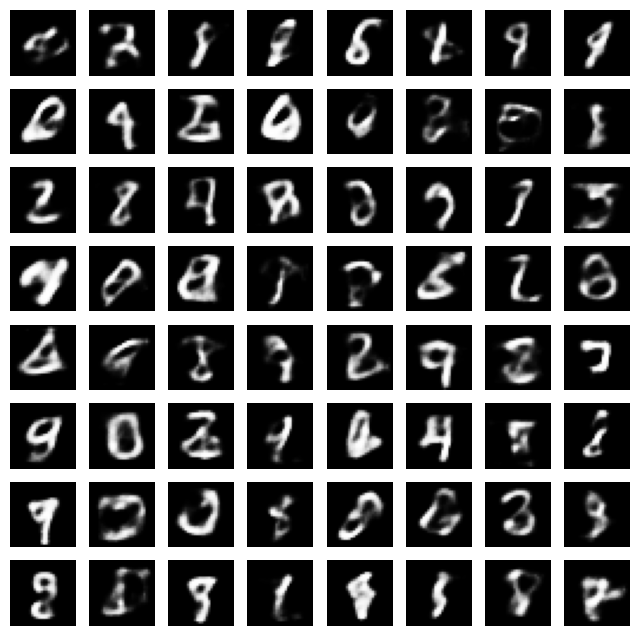

In [ ]:
import matplotlib.pyplot as plt

model.eval()

with torch.no_grad():
    z = torch.randn(64,20).to(device)
    generated = model.decoder(z).cpu()

generated = generated.view(-1, 1, 28, 28)
# Plot images
fig, axes = plt.subplots(8, 8, figsize=(8, 8))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(generated[i][0], cmap="gray")
    ax.axis("off")

plt.show()